In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

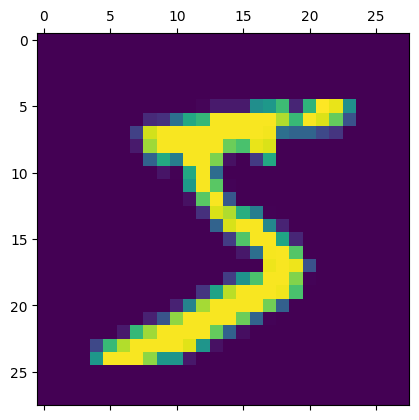

In [8]:
plt.matshow(X_train[0])

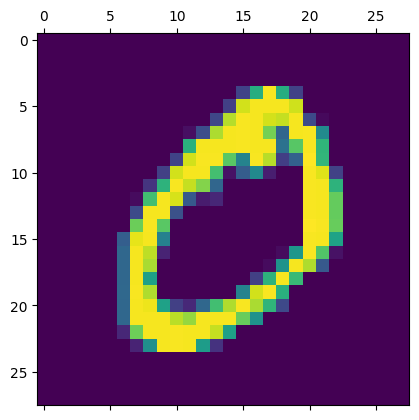

In [9]:
plt.matshow(X_train[1])

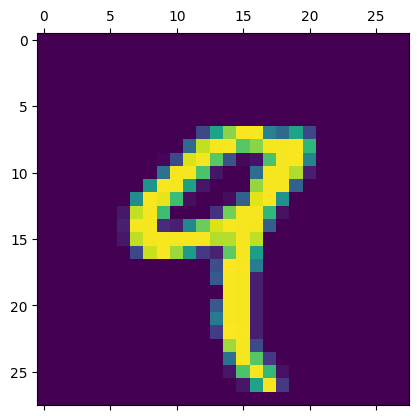

In [10]:
plt.matshow(X_train[4])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

- Pixel value lies between 0 - 255
- Scaling -> Dividing both training and testing data with 255 max value as to get resultant pixel values between 0 to 1

In [13]:
X_train = X_train / 255
X_test = X_test / 255

- After Scaling

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

- Creating simple neural network with 2 layers
- Input layer is 28 x 28 = 784 and Output Layer is from 0 to 9

In [15]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']        
    )


 - keras.layers.Flatten(input_shape=(28,28,3)),
   - If RGB image then 3 should be mentioned

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history1 = model1.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.9159 - val_loss: 0.1584 - val_accuracy: 0.9533
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1154 - accuracy: 0.9651 - val_loss: 0.1160 - val_accuracy: 0.9658
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0792 - accuracy: 0.9762 - val_loss: 0.1001 - val_accuracy: 0.9717
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.1529 - val_accuracy: 0.9563
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0927 - val_accuracy: 0.9746
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0407 - accuracy: 0.9863 - val_loss: 0.1095 - val_accuracy: 0.9703
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0320 - accuracy: 0.9892 - val_loss: 0.1023 - val_accuracy:

Training data accuracy is 99.46 %

- Plot training and validation loss

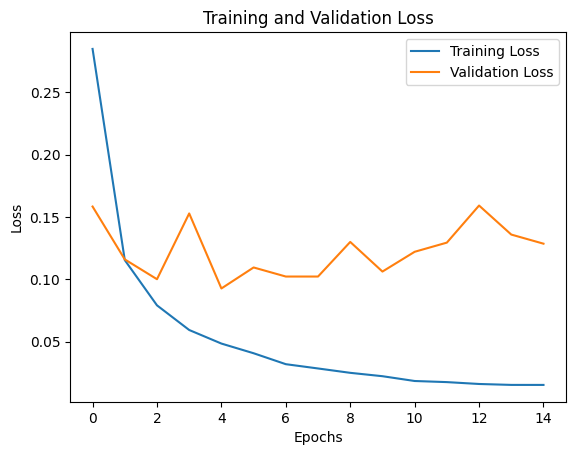

In [18]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

- Plot training and validation accuracy

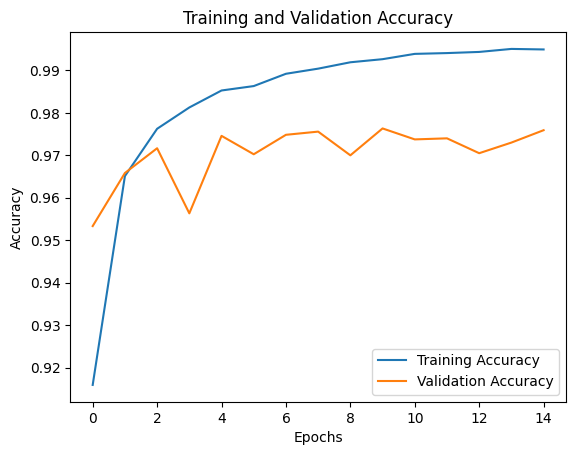

In [19]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')

# Set labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [20]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9777


[0.10912196338176727, 0.9776999950408936]

- Test data accuracy is 97.68 %

- y_test -> True Labels
- y_predicted1 -> Predicted Labels

In [21]:
y_predicted1 = model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_predicted1[0]

array([1.3082905e-09, 7.9210588e-10, 9.0116616e-09, 5.3292780e-07,
       4.7737786e-12, 1.9380668e-08, 8.6145474e-17, 9.9999952e-01,
       3.2760405e-11, 5.0677230e-08], dtype=float32)

In [23]:
np.argmax(y_predicted1[0])

7

- Using List Comprehension to fetch max values

In [24]:
y_predicted_labels1 = [np.argmax(i) for i in y_predicted1]
y_predicted_labels1[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [25]:
y_predicted1[1]

array([3.7961088e-23, 1.4879891e-17, 1.0000000e+00, 1.2383166e-11,
       1.4782726e-20, 4.4655394e-25, 3.2047635e-23, 7.3963635e-14,
       2.3774574e-15, 9.0061781e-29], dtype=float32)

In [26]:
y_predicted1

array([[1.30829048e-09, 7.92105881e-10, 9.01166164e-09, ...,
        9.99999523e-01, 3.27604055e-11, 5.06772295e-08],
       [3.79610880e-23, 1.48798907e-17, 1.00000000e+00, ...,
        7.39636352e-14, 2.37745737e-15, 9.00617805e-29],
       [4.21237409e-08, 9.99998331e-01, 7.53978071e-08, ...,
        2.31921334e-07, 8.25612801e-07, 2.02307371e-09],
       ...,
       [6.11858675e-18, 1.87285842e-12, 4.16898579e-16, ...,
        1.56210017e-12, 1.68903208e-13, 5.65154257e-10],
       [5.32549374e-13, 3.79043828e-22, 4.80887446e-19, ...,
        9.06532396e-22, 4.89522090e-10, 1.36794965e-14],
       [1.51608115e-10, 1.16851385e-12, 7.96211367e-17, ...,
        2.74671680e-23, 3.11198740e-11, 3.56743469e-15]], dtype=float32)

In [27]:
y_predicted1.shape

(10000, 10)

- Confusion Matrix

In [28]:
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    2,    1,    0,    1,    0,    2,    0],
       [   0, 1127,    1,    3,    0,    0,    0,    1,    3,    0],
       [   6,    1, 1010,    8,    2,    0,    1,    1,    3,    0],
       [   1,    0,    2,  995,    0,    3,    0,    3,    6,    0],
       [   2,    1,    8,    0,  952,    0,    3,    3,    1,   12],
       [   2,    0,    0,   10,    0,  865,    6,    0,    7,    2],
       [  10,    2,    1,    2,    4,    2,  936,    0,    1,    0],
       [   3,    4,   15,    4,    2,    0,    0,  992,    3,    5],
       [   2,    0,    8,    4,    1,    1,    3,    3,  950,    2],
       [   9,    3,    0,    6,    3,    5,    1,    1,    3,  978]])>

Text(95.72222222222221, 0.5, 'Truth')

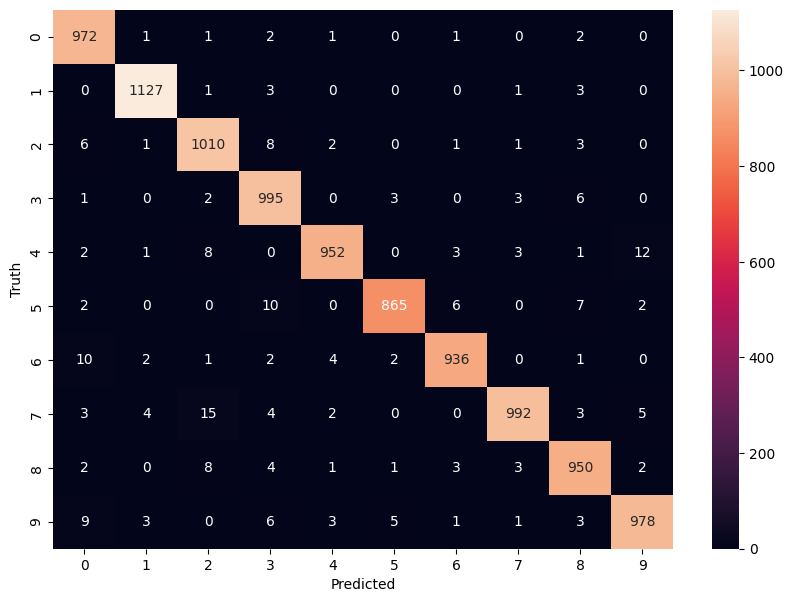

In [29]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
print(X_test.shape)

(10000, 28, 28)


- First data point in X_test

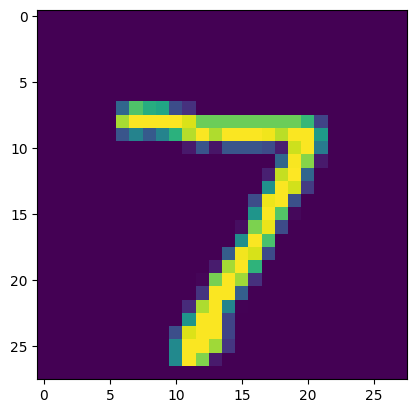

In [31]:
plt.imshow(X_test[0])
plt.show()

- Building a Predictive System

In [32]:
import cv2


In [33]:
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [34]:
type(input_image)

numpy.ndarray

In [35]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [36]:
cv2.imshow('input_image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [37]:
input_image.shape

(318, 318, 3)

- The given image is 318 X 318 in RGB form

- We have to convert it into greyscale image

In [38]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [39]:
grayscale.shape

(318, 318)

- Now coverting 318 X 318 into 28 x 28 dimesnion

In [40]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [41]:
input_image_resize.shape

(28, 28)

In [43]:
cv2.imshow('input_image_resize', input_image_resize)
cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

- Alternative way to show an image
  - plt.imshow(input_image_resize, cmap='gray')
  - plt.title('Resized Input Image')
  - plt.show()

- Scaling an image, dividing it by 255 to get the resultant pixel values between 0 and 1

In [44]:
input_image_resize = input_image_resize/255

In [45]:
type(input_image_resize)

numpy.ndarray

In [46]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

- image_reshaped = np.reshape(input_image_resize, [1,28,28,3])
  - 1 means for 1 image
  - 3 for RGB

In [47]:
input_prediction = model1.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 38ms/step
[[2.8824257e-37 8.2169606e-24 2.2889027e-28 1.0000000e+00 6.4252246e-26
  9.6248652e-17 3.8594852e-35 1.9597107e-25 1.8237284e-16 9.9948740e-19]]


In [48]:
input_pred_label = np.argmax(input_prediction)

In [50]:
print('The Handwritten Digit is recognised as ', input_pred_label)

The Handwritten Digit is recognised as  3


- Display the input image and the prediction

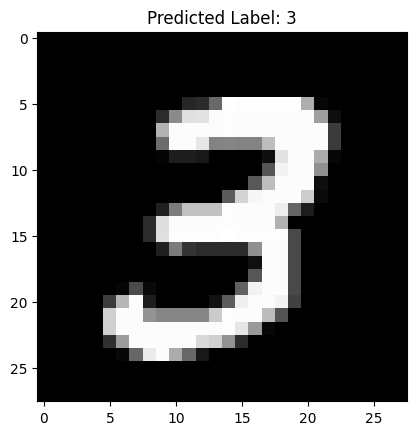

In [51]:
plt.imshow(input_image_resize, cmap='gray')
plt.title('Predicted Label: ' + str(input_pred_label))
plt.show()